# Fraud Detection Exploratory Analysis

### Aaron Collinsworth

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt

Load Data In

In [2]:
fraud_dataset = pd.read_csv("transactions.csv")

In [3]:
fraud_dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### 1. What is the distribution between fraudulent and non-fraudulent transactions?

0    1842743
1       9651
Name: is_fraud, dtype: int64


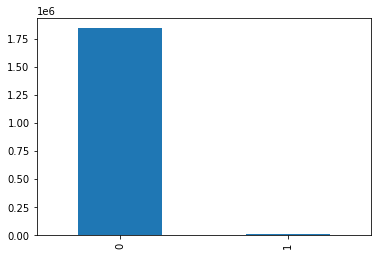

In [4]:
# Create histo and distribution of fraud & non-fraud transactions
fraud_dataset["is_fraud"].value_counts().plot(kind='bar')
print(fraud_dataset["is_fraud"].value_counts())

In [5]:
fraud_perc = len(fraud_dataset[fraud_dataset["is_fraud"] == 1])/len(fraud_dataset)
print("Fraudulent Transaction Percentage: {}".format(str(round(fraud_perc, 3)*100) + "%"))

Fraudulent Transaction Percentage: 0.5%


### 2. Which age groups are more susceptible to fraudulent transactions?

In [6]:
# Query number of fraud instances
fraud_instances = fraud_dataset.loc[fraud_dataset["is_fraud"] == 1]

In [7]:
years_born =  [int((datetime.today() - i).days//365.25) for i in pd.DatetimeIndex(fraud_instances['dob'])]
years_old_df = pd.DataFrame(years_born, columns=["years_old"])

<AxesSubplot:title={'center':'Fraudulent Age Distribution'}>

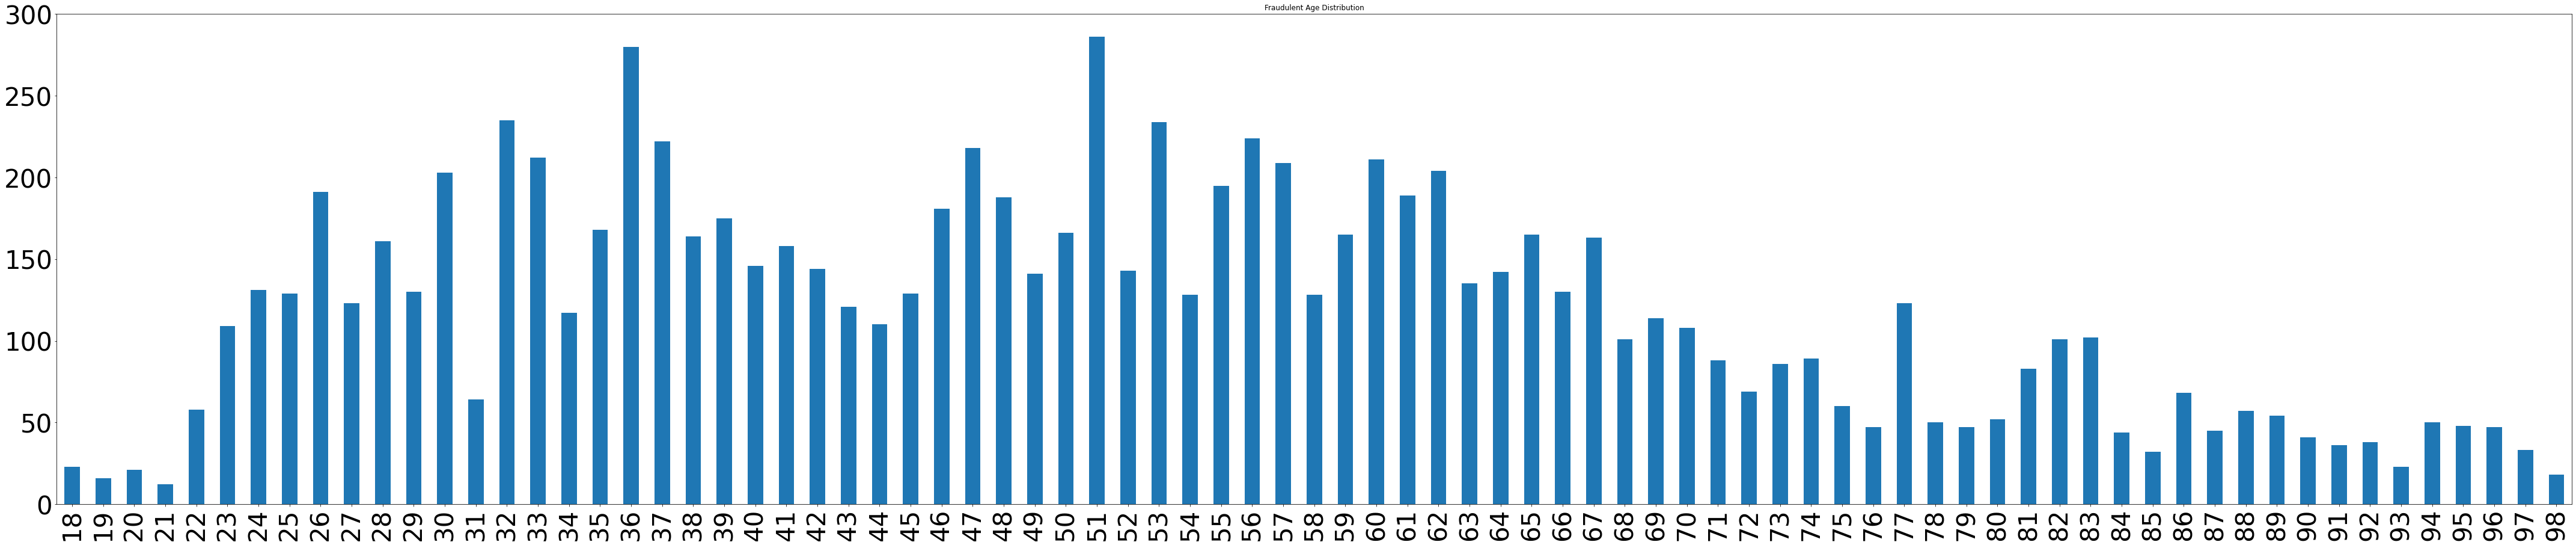

In [8]:
years_old_df["years_old"].sort_values().value_counts(sort=False).plot(kind='bar', title = "Fraudulent Age Distribution",
                                              figsize=(75, 15), fontsize=42)

### Sorting by instance counts

<AxesSubplot:title={'center':'Fraudulent Age Distribution'}>

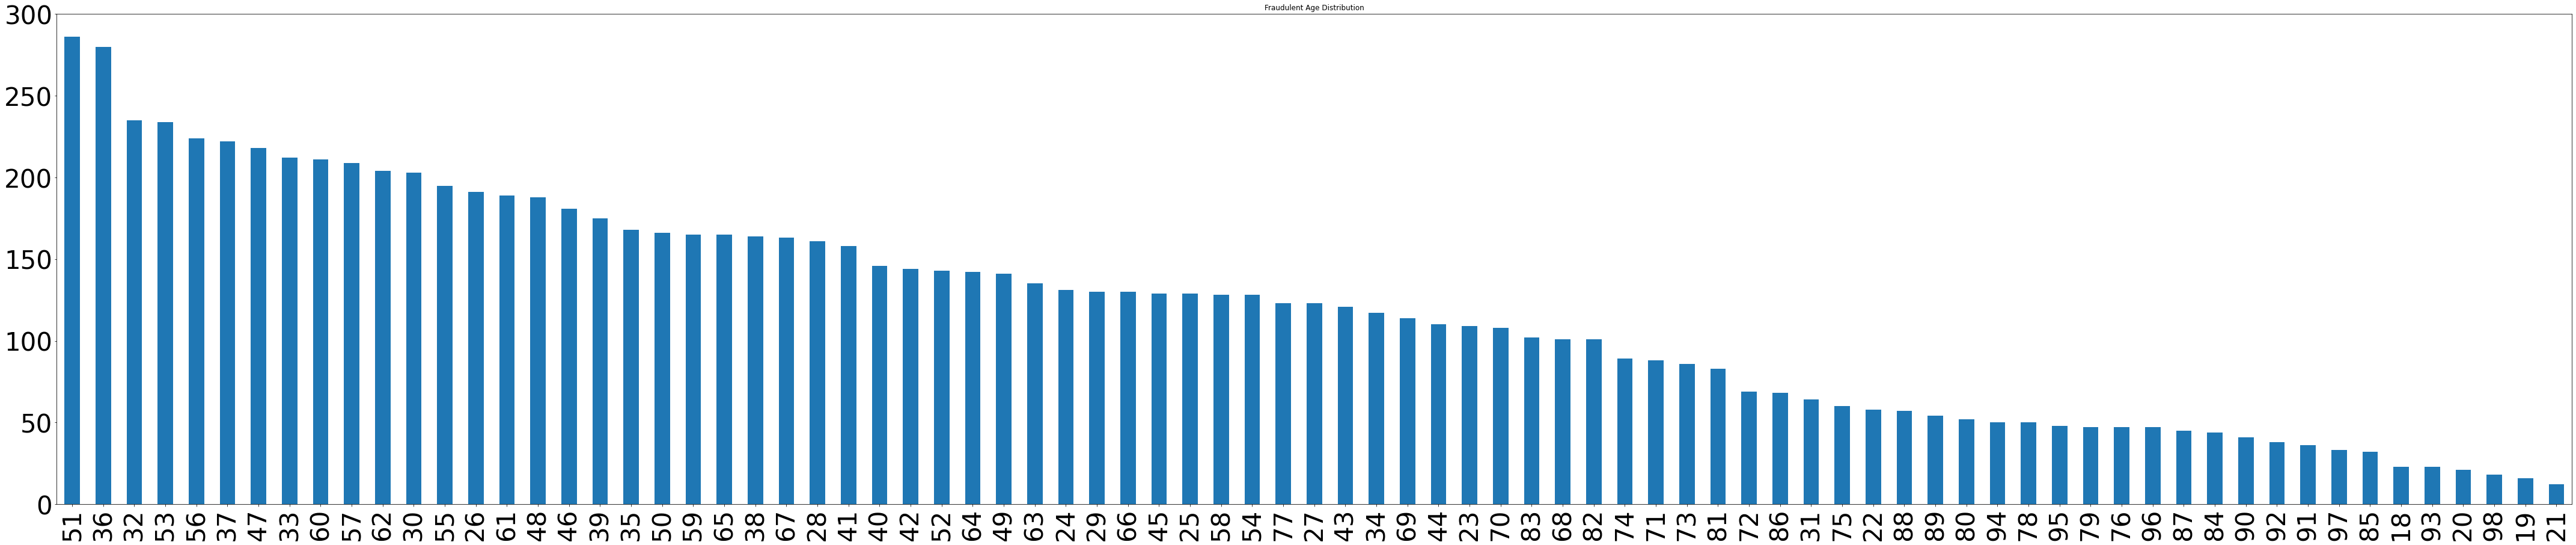

In [9]:
years_old_df["years_old"].sort_values().value_counts(sort=True).plot(kind='bar', title = "Fraudulent Age Distribution",
                                              figsize=(75, 15), fontsize=42)

Early 30s to early 60s contains many of the most targeted fraud ages. 51 in particular is the single age that stand out in terms of more fraud cases then the second most - 36.

3. If a fraudulent transaction has been committed, what is the expected number of transaction committed per day with the same victim? (Temporal component asking do fraudulent transactions occur multiple times on the same customer)

#### Need to extract date only from the timestamp column

In [10]:
fraud_dataset["datetime"] = pd.to_datetime(fraud_dataset['trans_date_trans_time']) 
fraud_dataset["date_only"] = fraud_dataset["datetime"].dt.floor('d')
fraud_dataset["date_only"].head()

0   2019-01-01
1   2019-01-01
2   2019-01-01
3   2019-01-01
4   2019-01-01
Name: date_only, dtype: datetime64[ns]

#### Group by customer and date, average by day

In [11]:
fraud_customers = fraud_dataset[fraud_dataset["is_fraud"] == 1]
avg_daily = fraud_customers.groupby(['cc_num', 'date_only'])['is_fraud'].count().mean(level='cc_num')
print(avg_daily)

cc_num
60416207185            4.5
60422928733            6.0
60423098130            5.0
60427851591            7.0
60487002085            4.0
                      ... 
4958589671582726883    3.5
4973530368125489546    5.0
4980323467523543940    5.0
4989847570577635369    7.5
4992346398065154184    4.0
Name: is_fraud, Length: 976, dtype: float64


/tmp/ipykernel_1478/4053089826.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  avg_daily = fraud_customers.groupby(['cc_num', 'date_only'])['is_fraud'].count().mean(level='cc_num')


#### 

In [12]:
avg_daily = fraud_customers.groupby(['cc_num', 'date_only'])['is_fraud'].count().mean(level='cc_num')
print(avg_daily)

cc_num
60416207185            4.5
60422928733            6.0
60423098130            5.0
60427851591            7.0
60487002085            4.0
                      ... 
4958589671582726883    3.5
4973530368125489546    5.0
4980323467523543940    5.0
4989847570577635369    7.5
4992346398065154184    4.0
Name: is_fraud, Length: 976, dtype: float64


/tmp/ipykernel_1478/1766524839.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  avg_daily = fraud_customers.groupby(['cc_num', 'date_only'])['is_fraud'].count().mean(level='cc_num')


### 4. For each purchase "category," plot the mean and standard "amt" between fraudulent transactions and non-fraudulent transactions


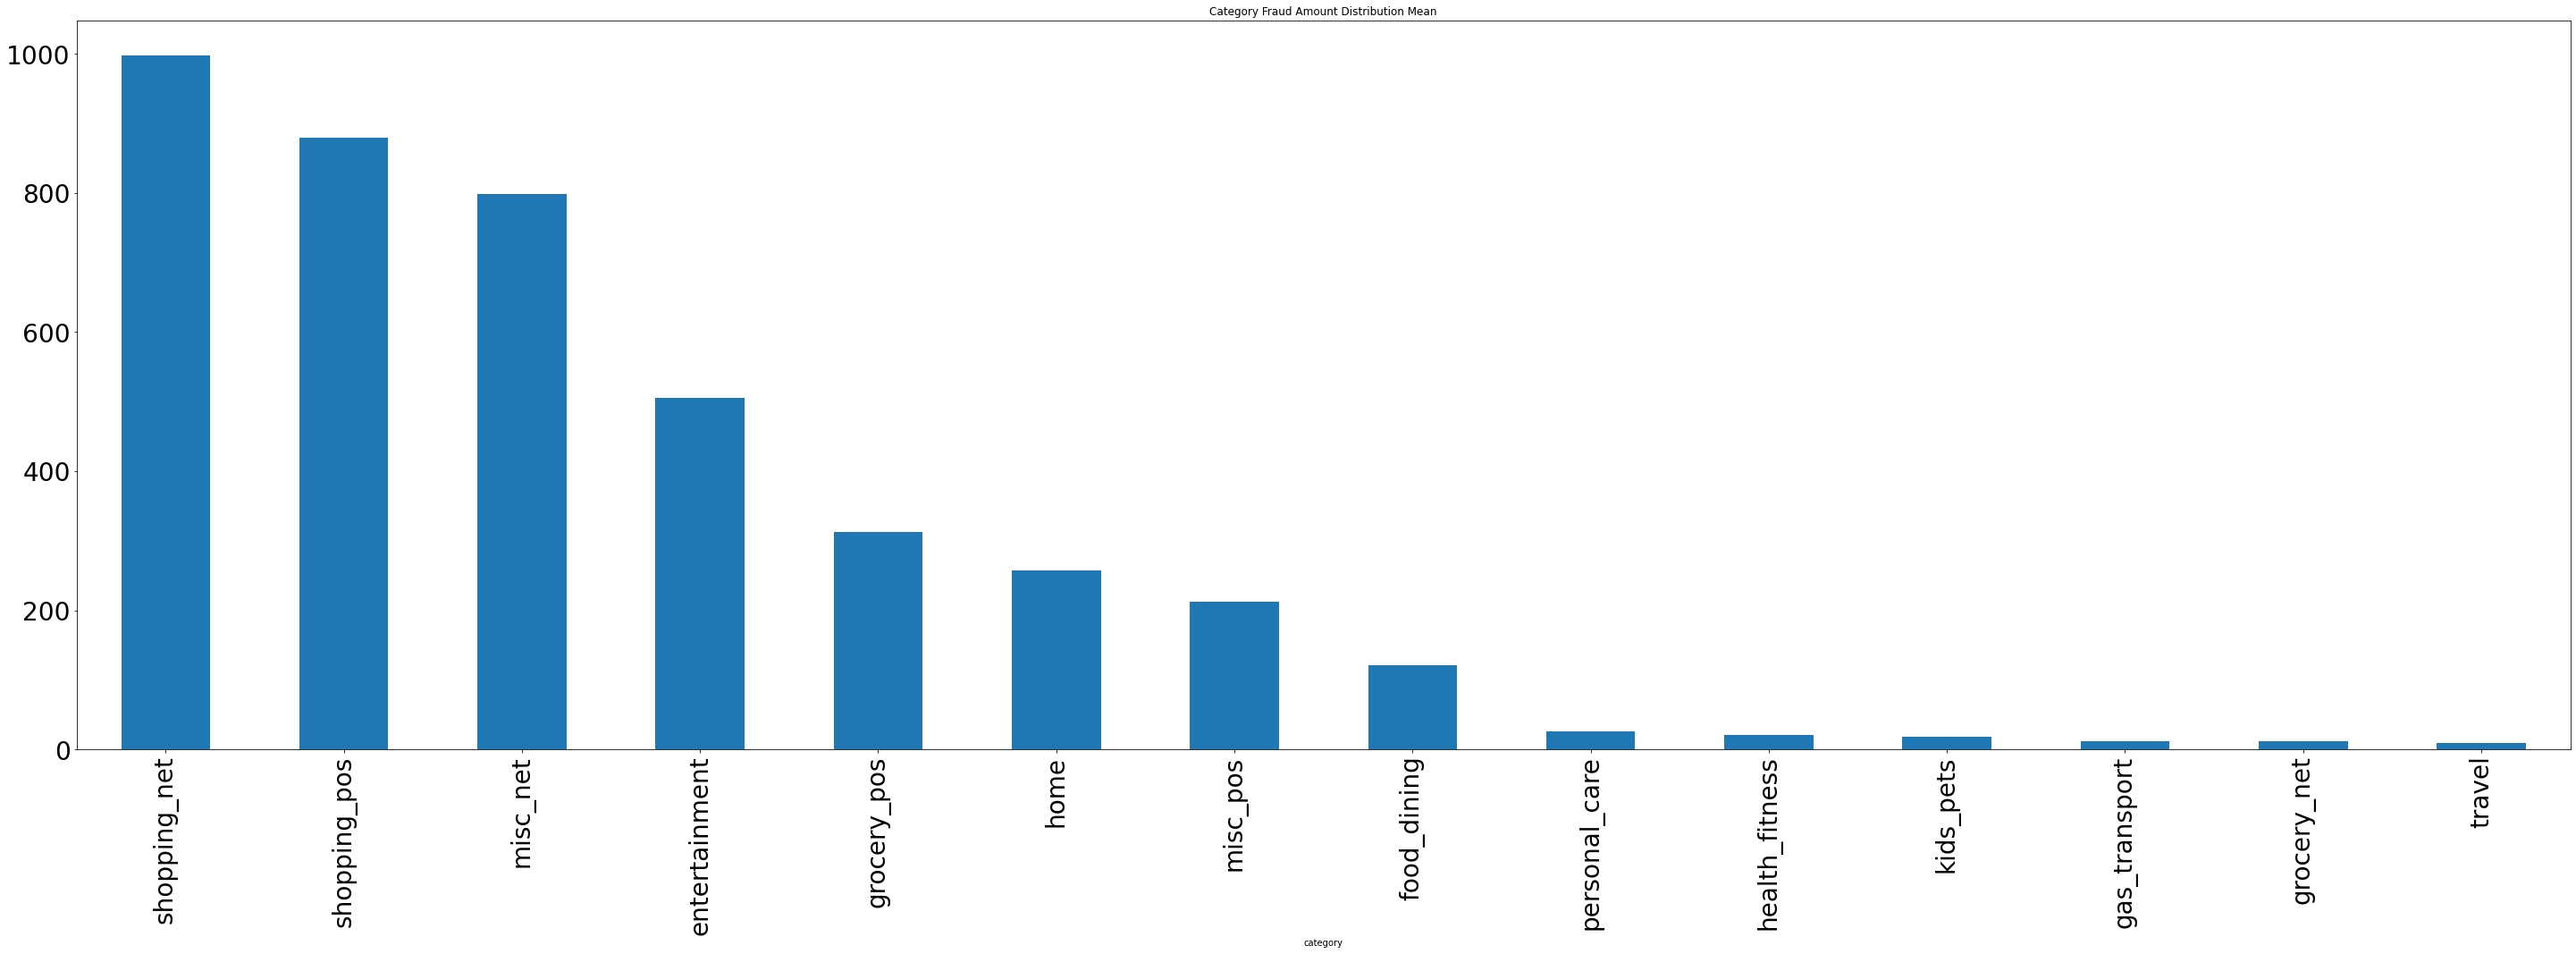

In [13]:
cat_means = fraud_customers.groupby(["category"])["amt"].mean().sort_values(ascending=False).plot(kind='bar', title = "Category Fraud Amount Distribution Mean",
                                              figsize=(50, 15), fontsize=28)

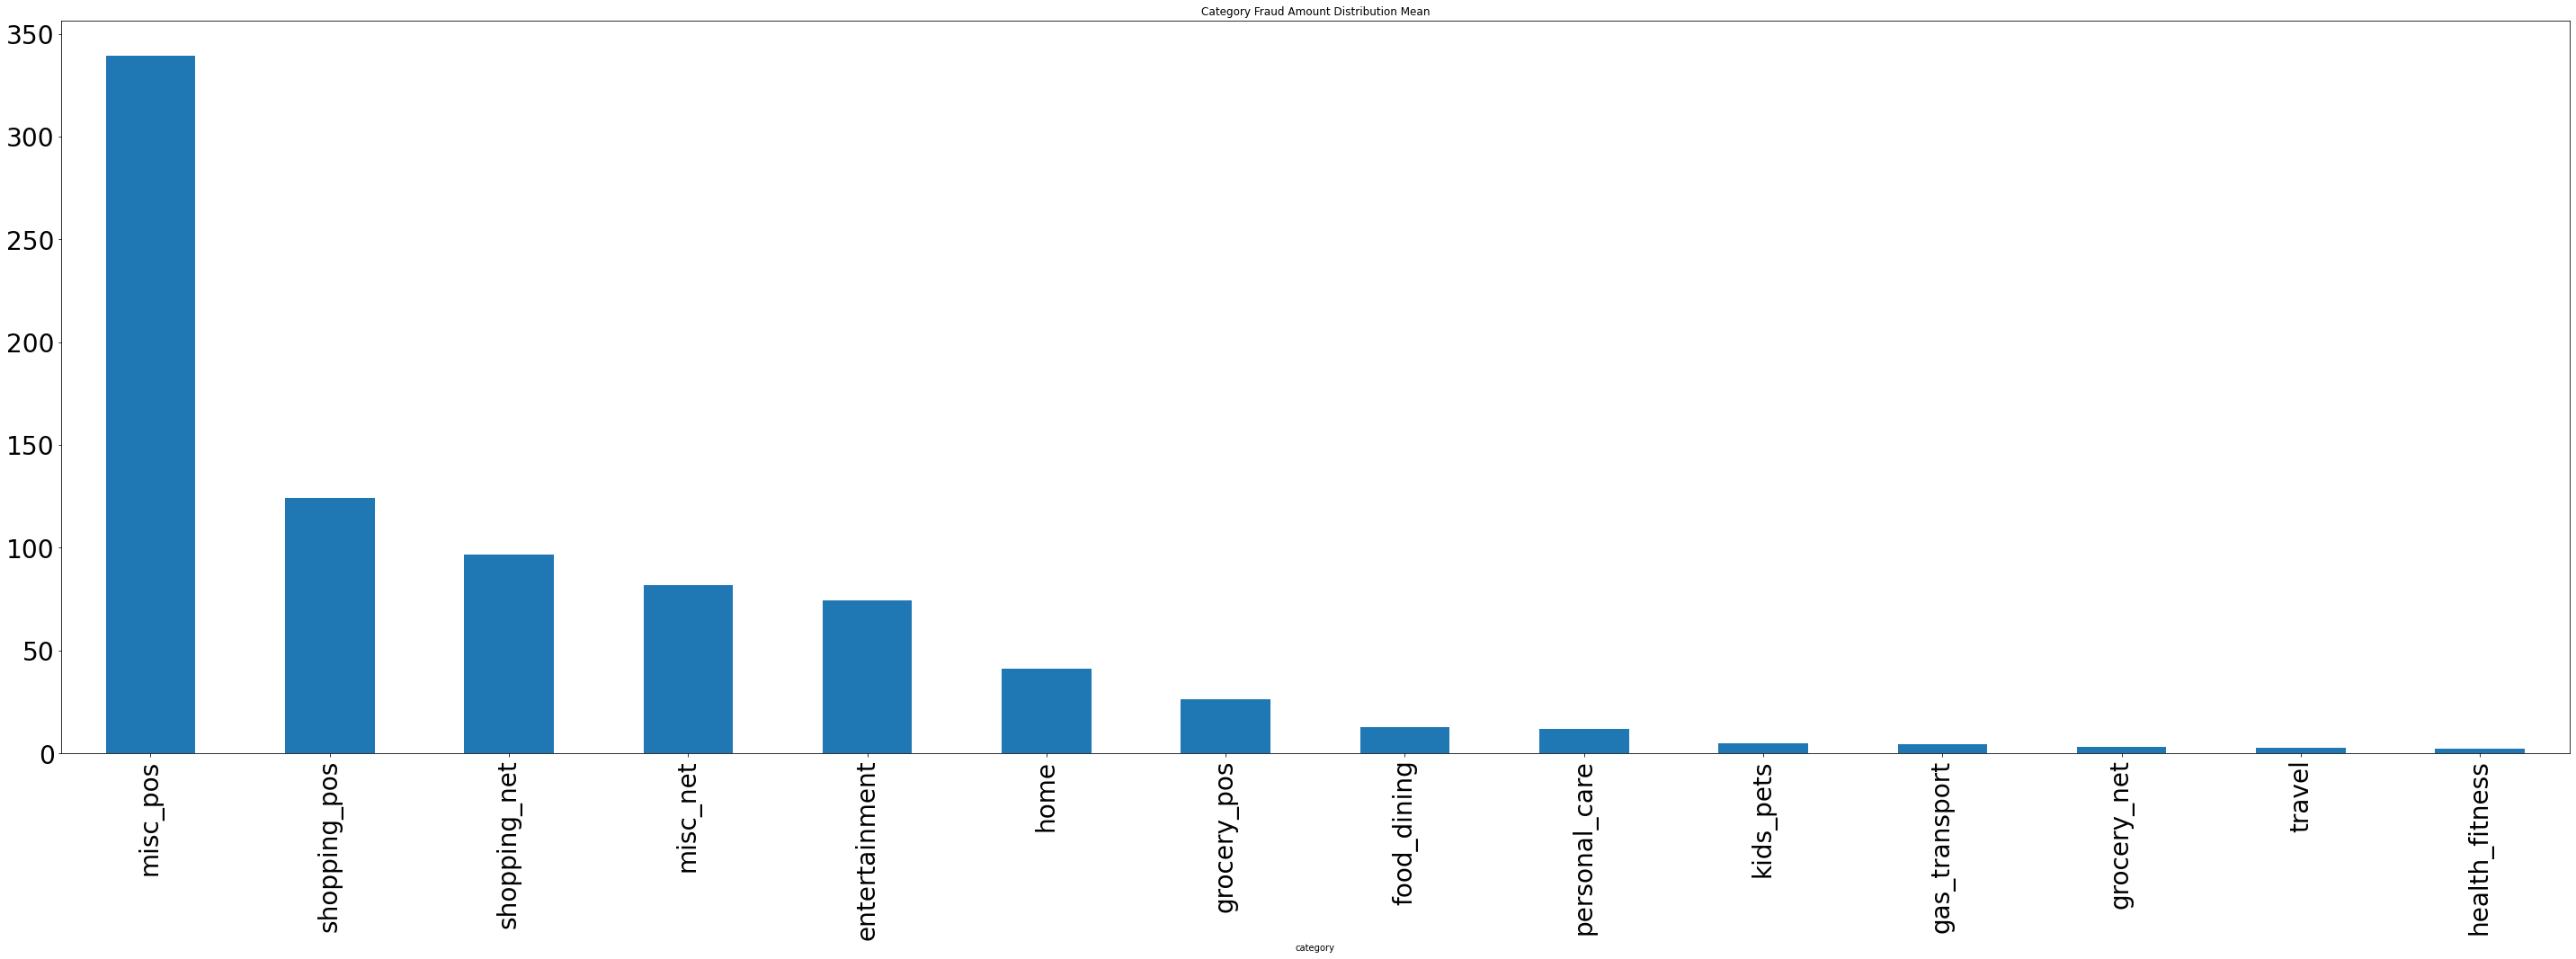

In [14]:
cat_std = fraud_customers.groupby(["category"])["amt"].std().sort_values(ascending=False).plot(kind='bar', title = "Category Fraud Amount Distribution Mean",
                                              figsize=(50, 15), fontsize=28)

### 5. What is the distribution between time transactions between fraudulent transactions and non-fraudulent transactions? What is the most likely time of a fraudulent transaction?


##### Create elapsed day column - Fraud

In [15]:
def add_day_jump_col(fraud_data):

    fraud_data_copy = fraud_data.copy()
    min_date = min(fraud_data_copy["date_only"])
    fraud_data_copy["min_date"]  = min_date
    fraud_data_copy["elapsed_day"] = (fraud_data_copy["date_only"] - fraud_data_copy["min_date"]).dt.days
    fraud_data_copy["day_jump_since_last"] = fraud_data_copy["elapsed_day"] - fraud_data_copy["elapsed_day"].shift(1)
    fraud_data_copy_no_firstrow = fraud_data_copy[fraud_data_copy["day_jump_since_last"].notna()]

    return fraud_data_copy_no_firstrow

<AxesSubplot:>

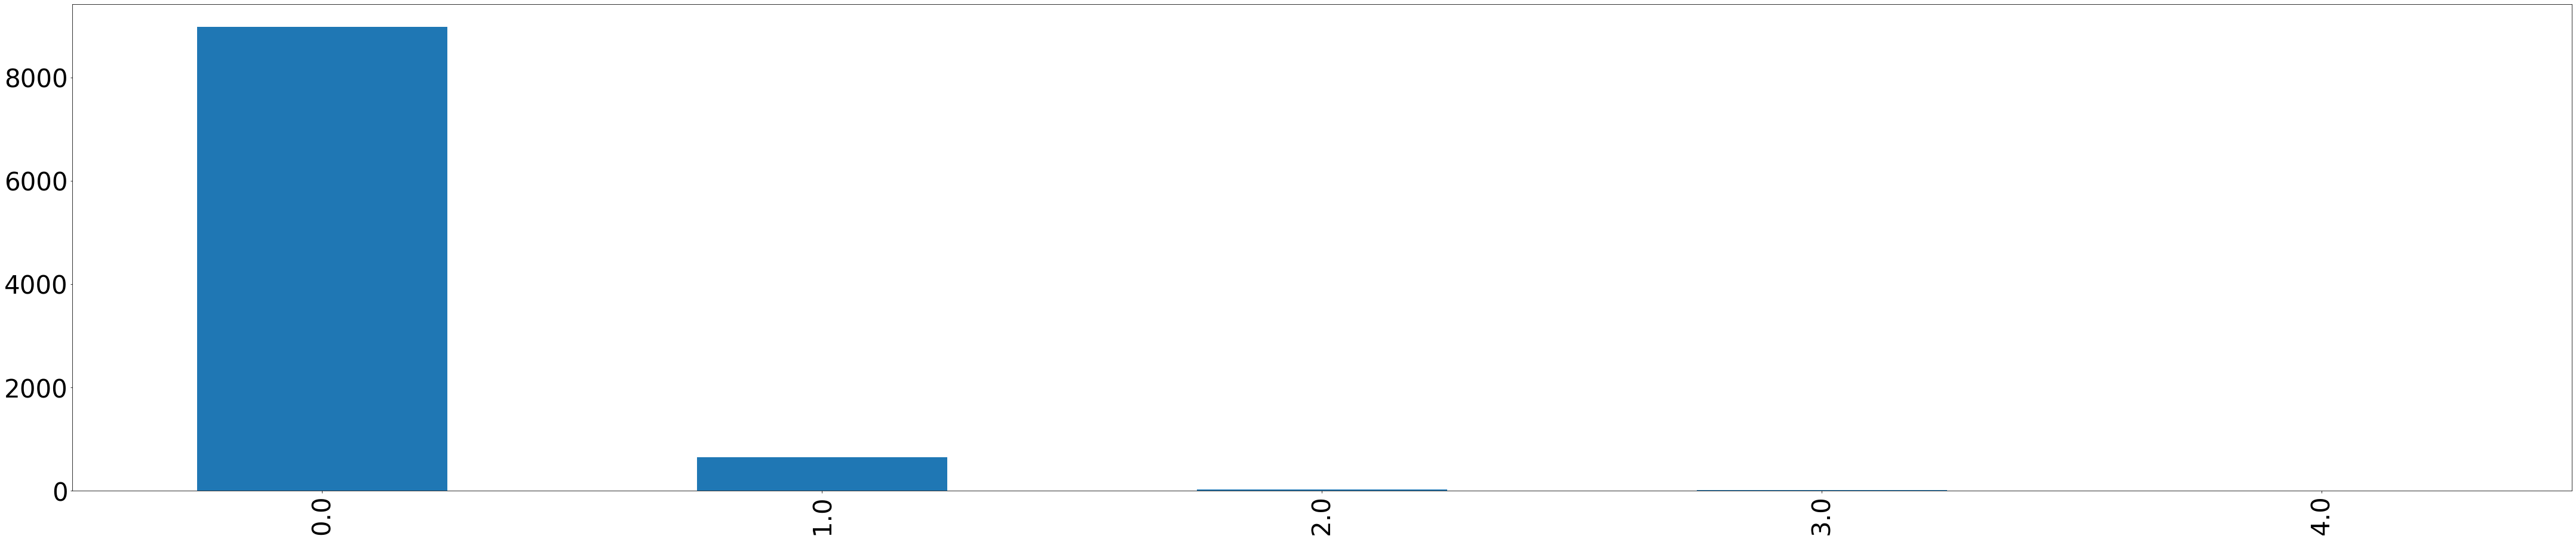

In [16]:
fraud_data = fraud_dataset[fraud_dataset["is_fraud"] == 1]
fraud_data = add_day_jump_col(fraud_data)
fraud_data["day_jump_since_last"].value_counts(sort=True).plot(kind='bar', title = "",
                                              figsize=(75, 15), fontsize=42)

Fraud transactions happen almost every day, with some times a day occuring with no transactions. In rare circumstances 2 days are able to pass with no transactions.

<AxesSubplot:>

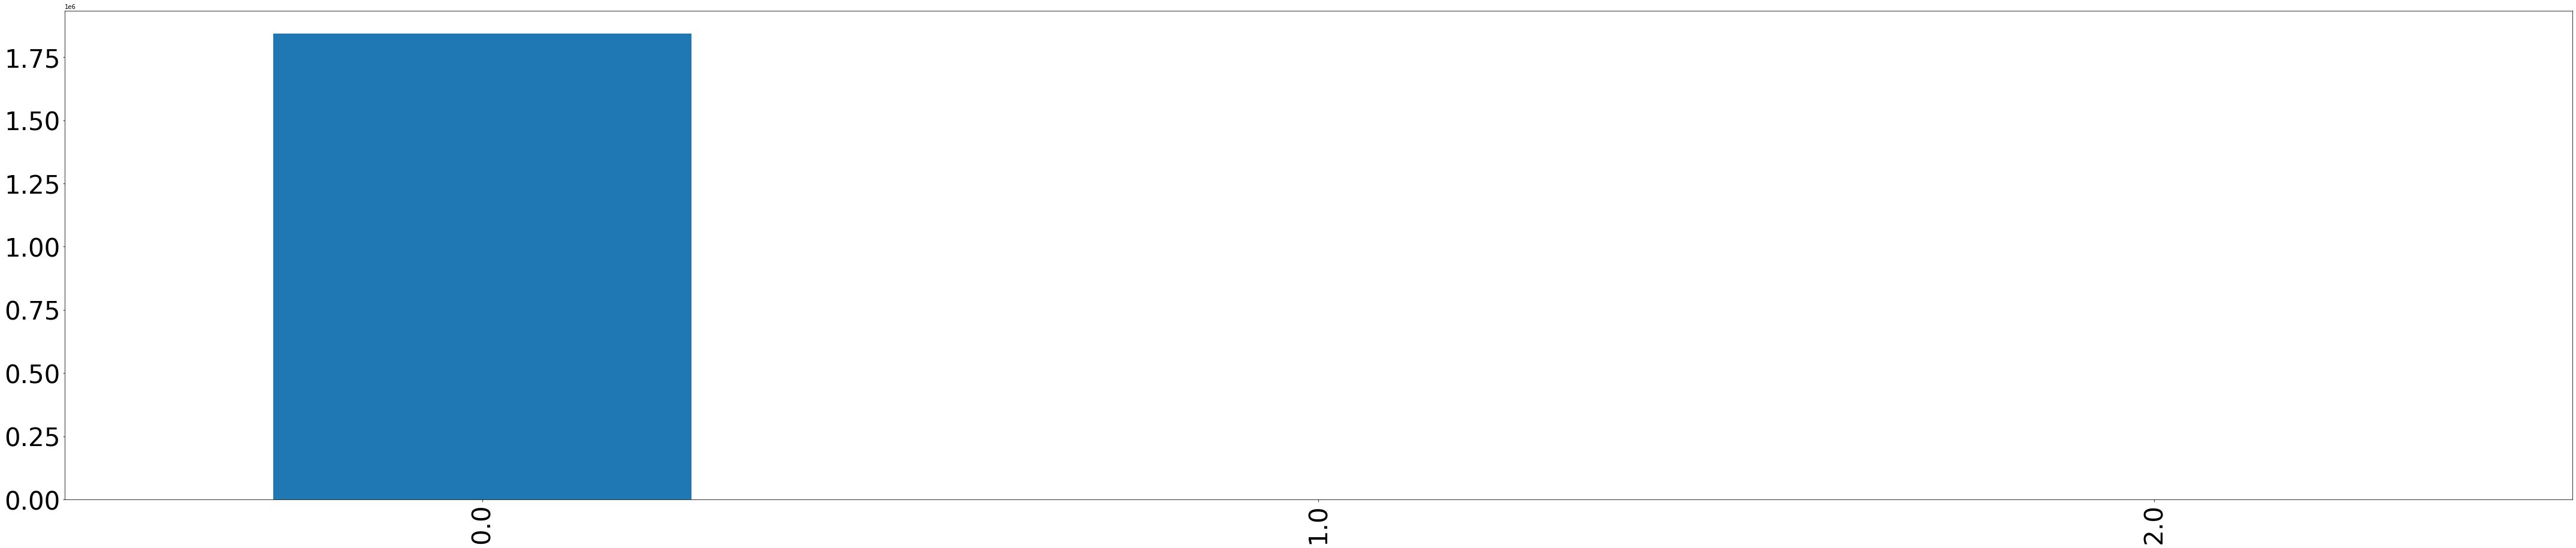

In [17]:
no_fraud_data = fraud_dataset[fraud_dataset["is_fraud"] == 0]
no_fraud_data = add_day_jump_col(no_fraud_data)
no_fraud_data["day_jump_since_last"].value_counts(sort=True).plot(kind='bar', title = "",
                                              figsize=(75, 15), fontsize=42)

Non Fraud transactions happen every day.

### 6. Is there a relationship between the distance between customer location (lat/lon) and merchant location (merch_lat/merch_lon) and fraudulent transactions?


Concatenate customer coords -> merchant coords

In [18]:
def cust_merch_coordinates(coordinates):
    return ( (coordinates[0], coordinates[1]), (coordinates[2], coordinates[3]) )

In [19]:
fraud_data_copy = fraud_data.copy()
cust_merch_coords = [str(cust_merch_coordinates(xy)) for xy in zip(fraud_data_copy.lat, fraud_data_copy.long, fraud_data_copy.merch_lat, fraud_data_copy.merch_long)]

fraud_data_copy["cust_merchant_lat_lon"] = cust_merch_coords

print(fraud_data_copy["cust_merchant_lat_lon"])

2472             ((29.44, -98.459), (29.819364, -99.142791))
2523              ((29.44, -98.459), (29.273085, -98.83636))
2546           ((35.9946, -81.7266), (35.909292, -82.09101))
2553              ((29.44, -98.459), (29.786426, -98.68341))
2937       ((35.9946, -81.7266), (35.987802, -81.25433199...
                                 ...                        
1813872    ((34.6323, -89.8855), (34.573471000000005, -89...
1813949       ((34.6323, -89.8855), (34.091227, -90.390612))
1814016    ((34.6323, -89.8855), (34.628434000000006, -90...
1814204       ((34.6323, -89.8855), (34.746063, -90.401093))
1814246       ((34.6323, -89.8855), (33.771462, -90.651342))
Name: cust_merchant_lat_lon, Length: 9650, dtype: object


In [20]:
# Encode Coordinates column
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

# define ordinal encoding
encoder = OrdinalEncoder()
np_array = fraud_data_copy["cust_merchant_lat_lon"].to_numpy().reshape(-1, 1)

# encode data and assigned encoded np column back into dataframe
result = encoder.fit_transform(np_array)
fraud_data_copy["cust_merchant_lat_lon_encoded"] = result
print(fraud_data_copy["cust_merchant_lat_lon_encoded"])

2472        370.0
2523        366.0
2546       2737.0
2553        368.0
2937       2739.0
            ...  
1813872    2230.0
1813949    2227.0
1814016    2232.0
1814204    2233.0
1814246    2226.0
Name: cust_merchant_lat_lon_encoded, Length: 9650, dtype: float64


In [21]:
cat_std = fraud_data_copy.groupby(["cust_merchant_lat_lon_encoded"])["is_fraud"].count().sort_values(ascending=False)
print(cat_std)

cust_merchant_lat_lon_encoded
0.0       1
6427.0    1
6429.0    1
6430.0    1
6431.0    1
         ..
3217.0    1
3218.0    1
3219.0    1
3220.0    1
9649.0    1
Name: is_fraud, Length: 9650, dtype: int64


Every instance of fraud in the dataset has unique customer and merchant locations

### 7. Are certain states, cities, and zip codes more susceptible to fraudulent transactions?

<AxesSubplot:>

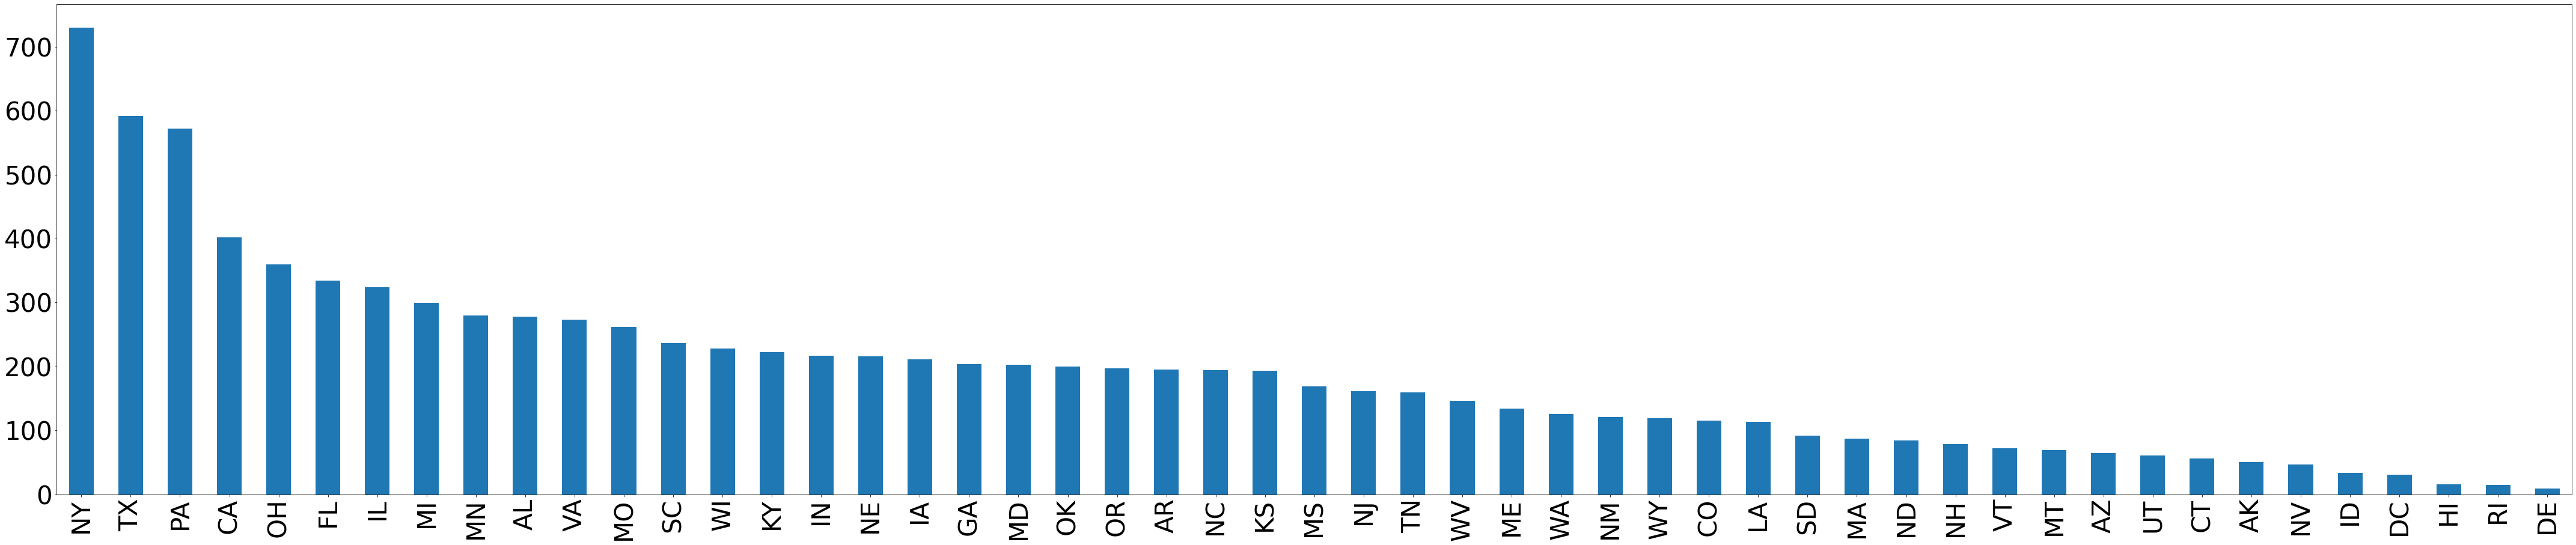

In [22]:
fraud_data_copy["state"].value_counts(sort=True).plot(kind='bar', title = "",
                                              figsize=(75, 15), fontsize=42)

<AxesSubplot:title={'center':'Top 100 Fraud Cities'}>

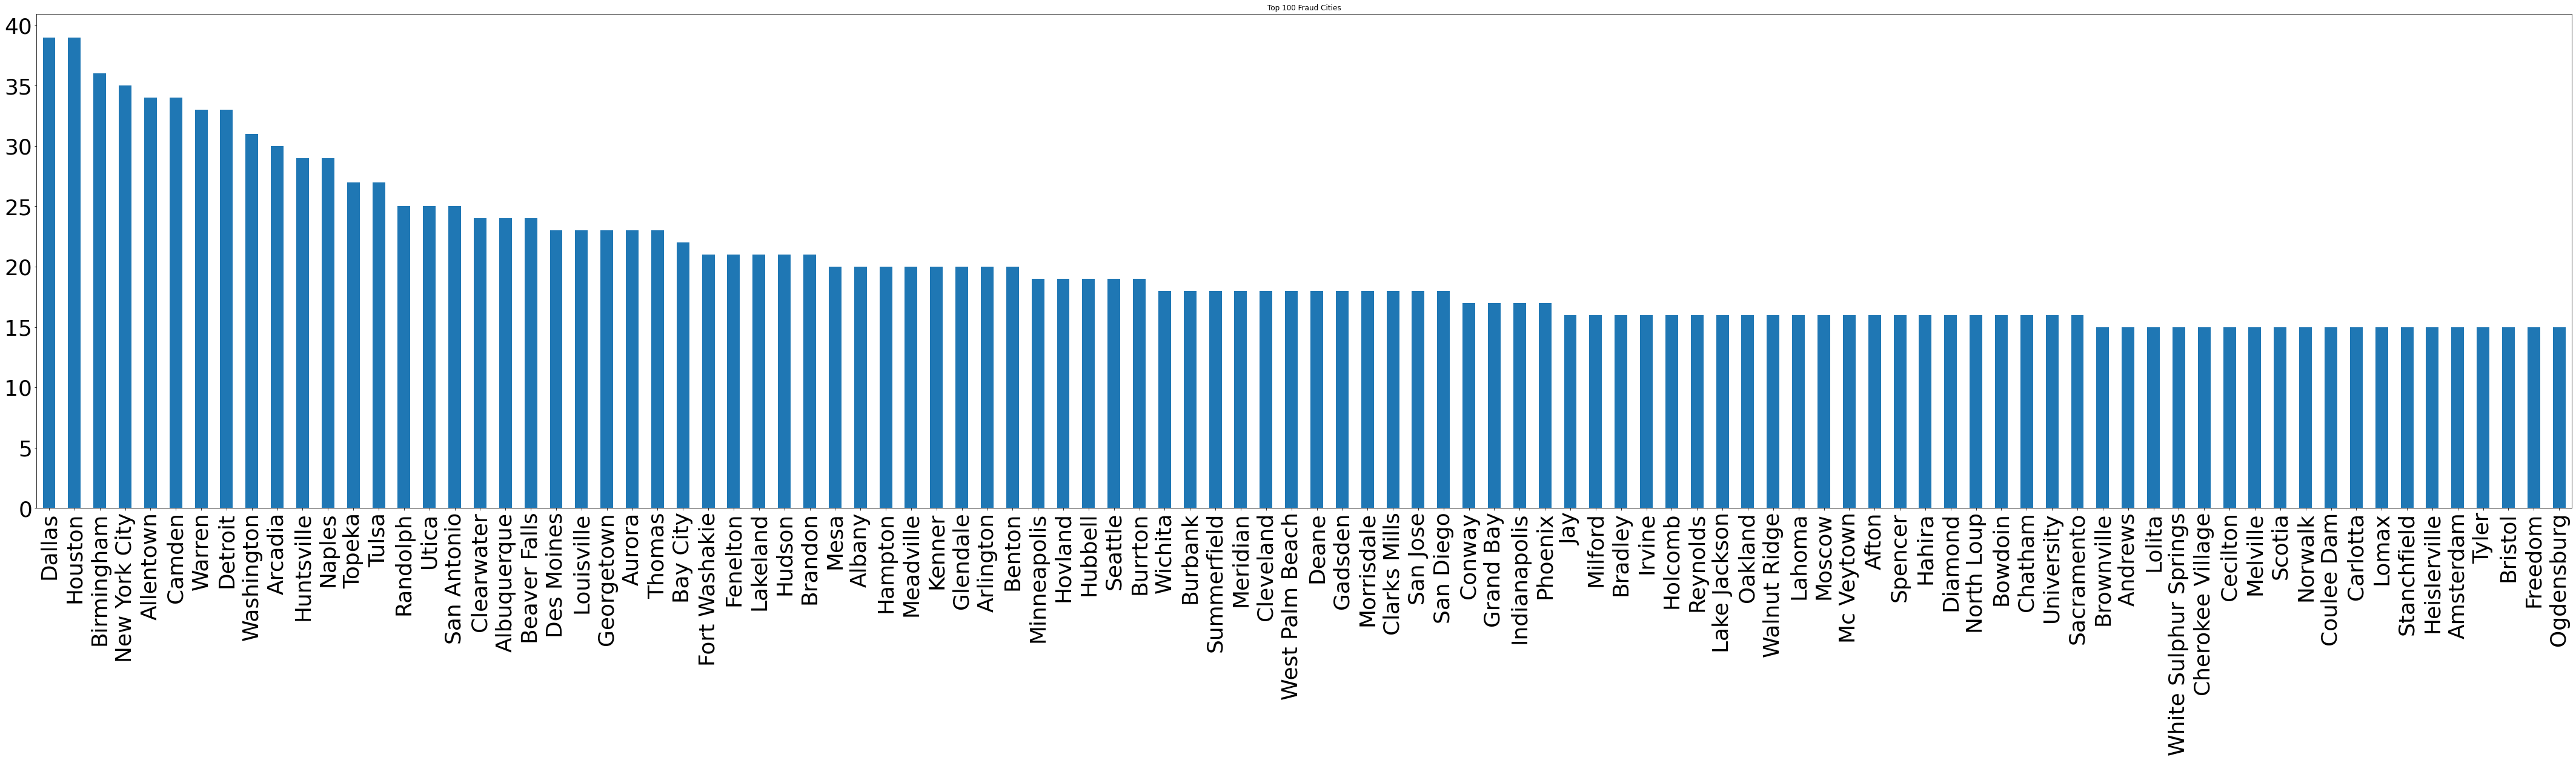

In [23]:
fraud_cities = fraud_data_copy["city"].value_counts(sort=True)

top_fraud_cities = fraud_cities.iloc[0:100]
bottom_fraud_cities = fraud_cities.iloc[(len(fraud_cities) - 100):len(fraud_cities)]

top_fraud_cities.plot(kind='bar', title = "Top 100 Fraud Cities", figsize=(75, 15), fontsize=36)

Texas cities Dallas and Houston sits at the top of most fraudulant cities. New York City follows in spot #4, which is not surprising since of how overwhelming the amount of fraud that takes place in New York State was in the previous histogram. 

<AxesSubplot:title={'center':'Bottom 100 Fraud Cities'}>

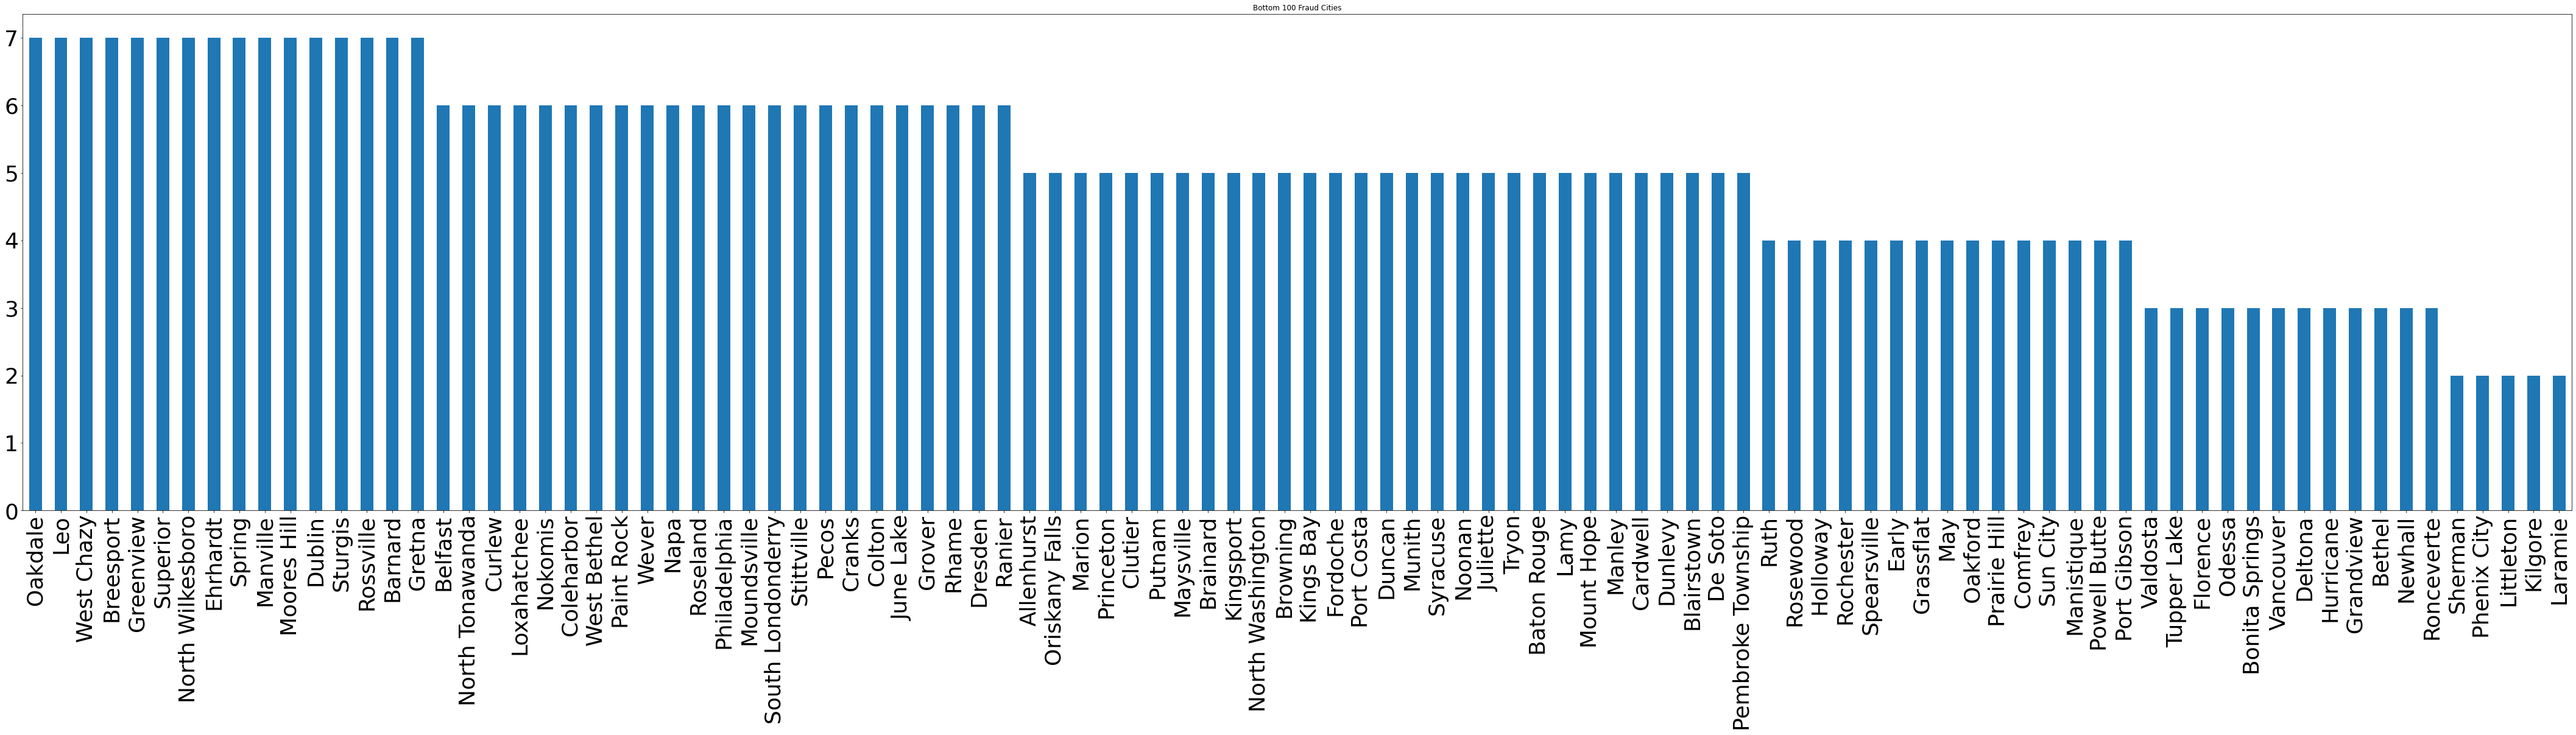

In [24]:
bottom_fraud_cities.plot(kind='bar', title = "Bottom 100 Fraud Cities", figsize=(75, 15), fontsize=36)

Smaller, more obscure cities make up the bottom 100 cities in terms of # of fraud cases. There are surpringly a few cities with only 2 cases of fraud.

### 8. What is the distribution of fraudulent and non-fraudulent transactions occurring for each day of the week (i.e., Sunday, Monday, etc.), each month of the year (i.e., January, February)?

In [25]:
date_format = '%Y-%m-%d %H:%M:%S'

fraud_dataset_copy = fraud_dataset.copy()

# Sunday = 1
weekday_column = [(datetime.strptime(row_date, date_format).toordinal()%7 + 1) for row_date in fraud_dataset_copy.trans_date_trans_time]
month_column = [datetime.strptime(row_date, date_format).month for row_date in fraud_dataset_copy.trans_date_trans_time]

In [26]:
fraud_dataset_copy["weekday"] = weekday_column
fraud_dataset_copy["month"] = month_column

In [27]:
for day in range(1, 8):
    weekday_query = fraud_dataset_copy[fraud_dataset_copy["weekday"]  ==  day]
    weekday_fraud_perc = len(weekday_query) / len(fraud_dataset_copy)
    print("Weekday #{}: {} transactions are fraud".format(day, str(round(weekday_fraud_perc, 6)*100) + "%"))

Weekday #1: 18.5531% transactions are fraud
Weekday #2: 19.9427% transactions are fraud
Weekday #3: 14.5941% transactions are fraud
Weekday #4: 9.9284% transactions are fraud
Weekday #5: 11.1607% transactions are fraud
Weekday #6: 11.610800000000001% transactions are fraud
Weekday #7: 14.2101% transactions are fraud


When fraud occurs, it's most likely to happen on a Sunday or a Monday.

In [28]:
for month in range(1, 13):
    month_query = fraud_dataset_copy[fraud_dataset_copy["month"]  ==  month]
    month_fraud_perc = len(month_query) / len(fraud_dataset_copy)
    print("Month #{}: {} transactions are fraud".format(month, str(round(month_fraud_perc, 3)*100) + "%"))

Month #1: 5.7% transactions are fraud
Month #2: 5.3% transactions are fraud
Month #3: 7.8% transactions are fraud
Month #4: 7.3% transactions are fraud
Month #5: 7.9% transactions are fraud
Month #6: 9.4% transactions are fraud
Month #7: 9.3% transactions are fraud
Month #8: 9.5% transactions are fraud
Month #9: 7.6% transactions are fraud
Month #10: 7.5% transactions are fraud
Month #11: 7.7% transactions are fraud
Month #12: 15.1% transactions are fraud


9. Compared to any other time of the year, how prevalent are fraudulent transactions during the holidays (11-30 to 12-31)? During post-holidays (1-1 to 2-28)? During the summer (05-24 to 09-01)?


Holidays from late November to early are  almost double what they are on average for the rest of the year. This would be due to the high increase in holiday spending. On the contarary, fraud transactions drop in Jannuary and February post holiday. I would guess this is due to the fact people cut their spending post holiday, which in turn less credit card information is compromised. Fraud then upticks a little bit in the spring months and finally maxes out in the summer months June-August before declining and entering the holiday cycle again.

10. Is there a relationship between between "city_pop" and incidence of fraud?


In [29]:
fraud_pop_cities = fraud_data_copy["city_pop"].value_counts(sort=True)

top_fraud_pop_cities = fraud_pop_cities.iloc[0:100]
bottom_fraud_pop_cities = fraud_pop_cities.iloc[(len(fraud_pop_cities) - 100):len(fraud_pop_cities)]

<AxesSubplot:title={'center':'Top 100 High Fraud Cities Based on Population'}>

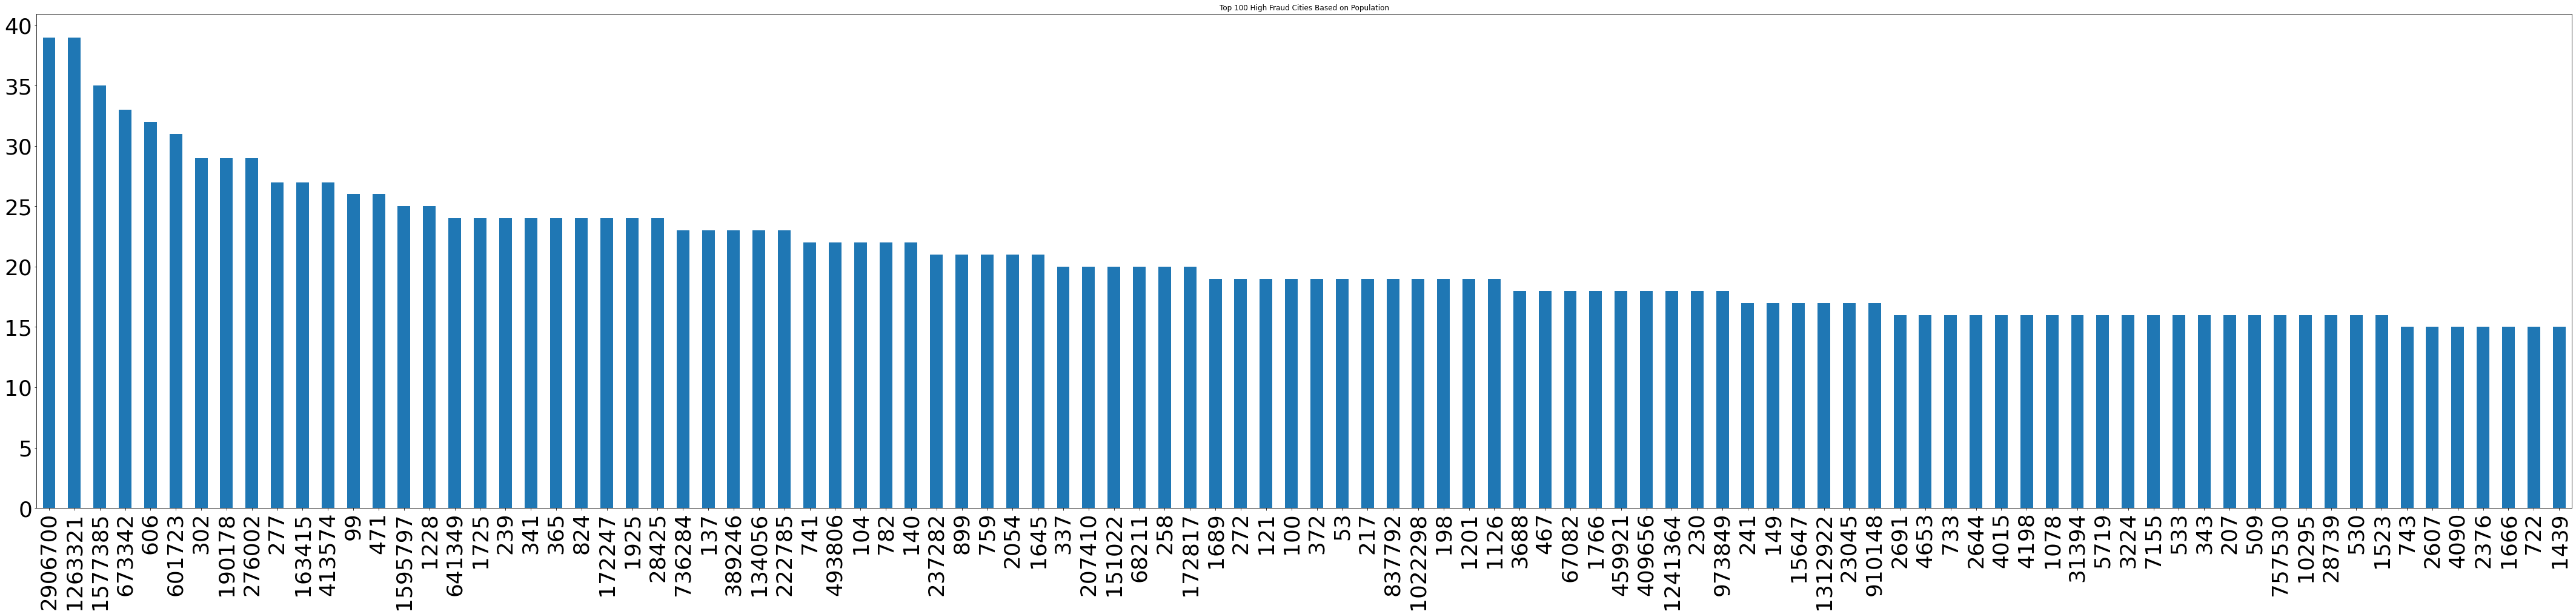

In [30]:
top_fraud_pop_cities.plot(kind='bar', title = "Top 100 High Fraud Cities Based on Population", figsize=(75, 15), fontsize=36)

Most of the top occurences happen in high pop cities. Interesting enough, there are some very low pop cities that have 25+ instances. High pop cities seem to be a loose indicator that more fraud can occur but there are many instances where low pop cities have high fraud rates.

<AxesSubplot:title={'center':'Bottom 100 Low Fraud Cities Based on Population'}>

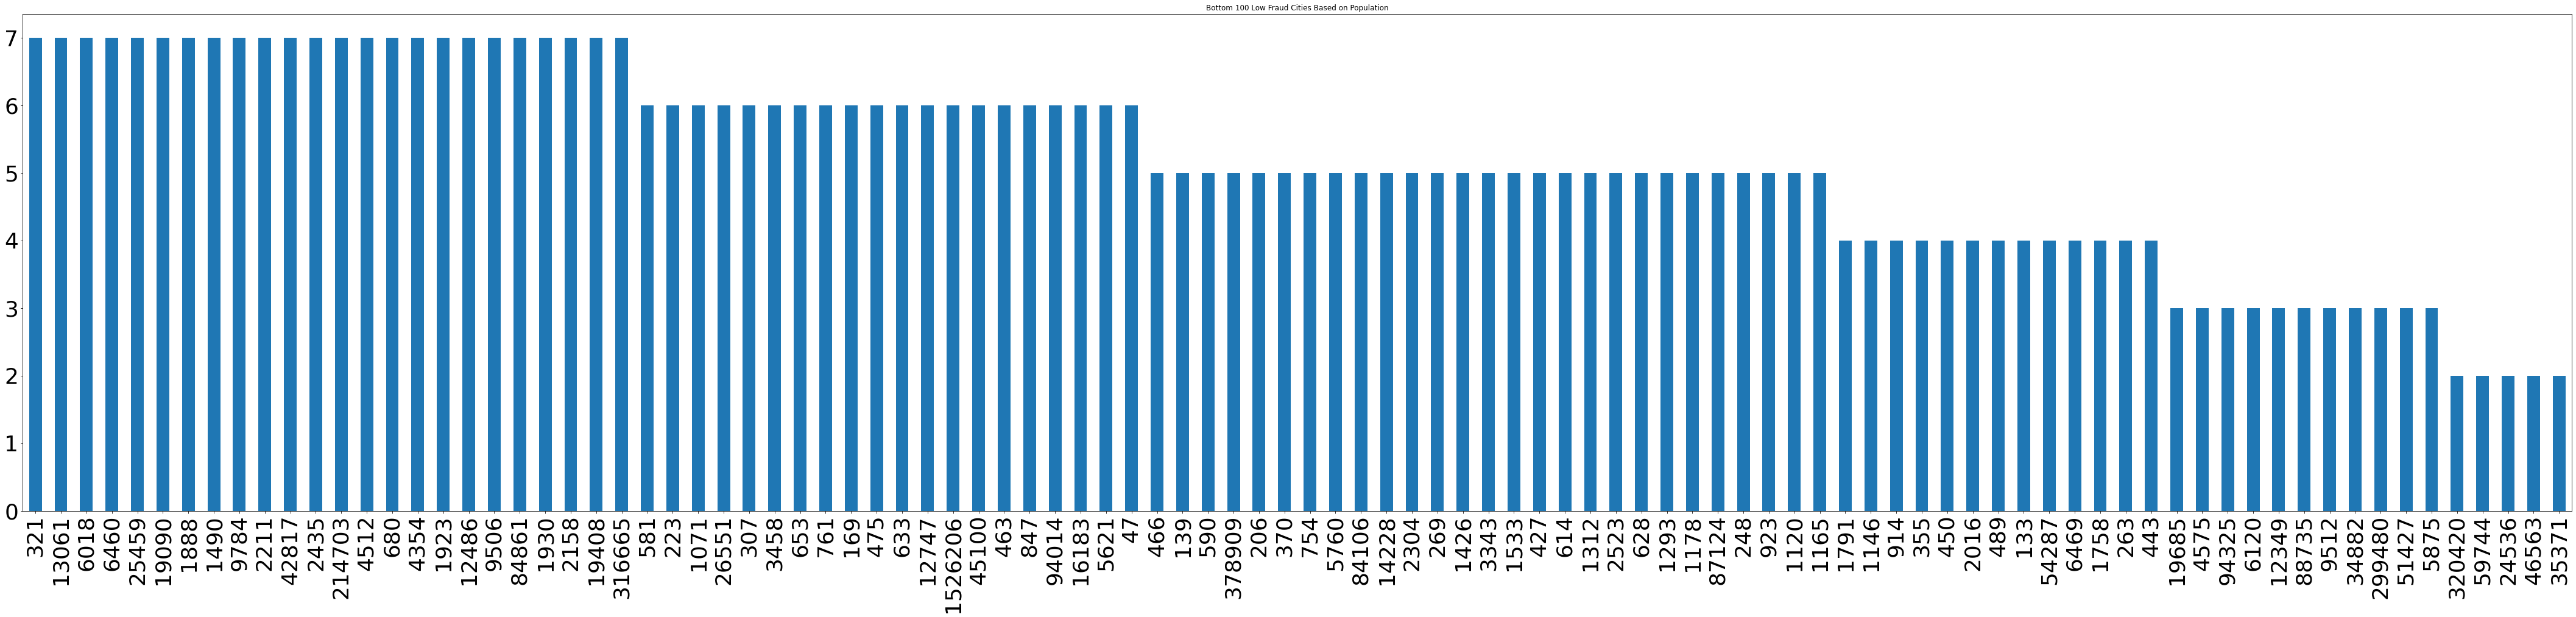

In [31]:
bottom_fraud_pop_cities.plot(kind='bar', title = "Bottom 100 Low Fraud Cities Based on Population", figsize=(75, 15), fontsize=36)

Once again, most low fraud cities are low pop. There are a few relatively high pop cities mixed in to the low pop. There is a loose correlation between population and fraud instances but it is by no means a determinant.

11. Are certain "jobs" susceptible to fraudulent transactions?

In [32]:
job_counts = fraud_data_copy["job"].value_counts(sort=True)

top_job_counts = job_counts.iloc[0:100]
bottom_job_counts = job_counts.iloc[(len(job_counts) - 100):len(job_counts)]

<AxesSubplot:title={'center':'Top 100 Counts of Fraud based on Job'}>

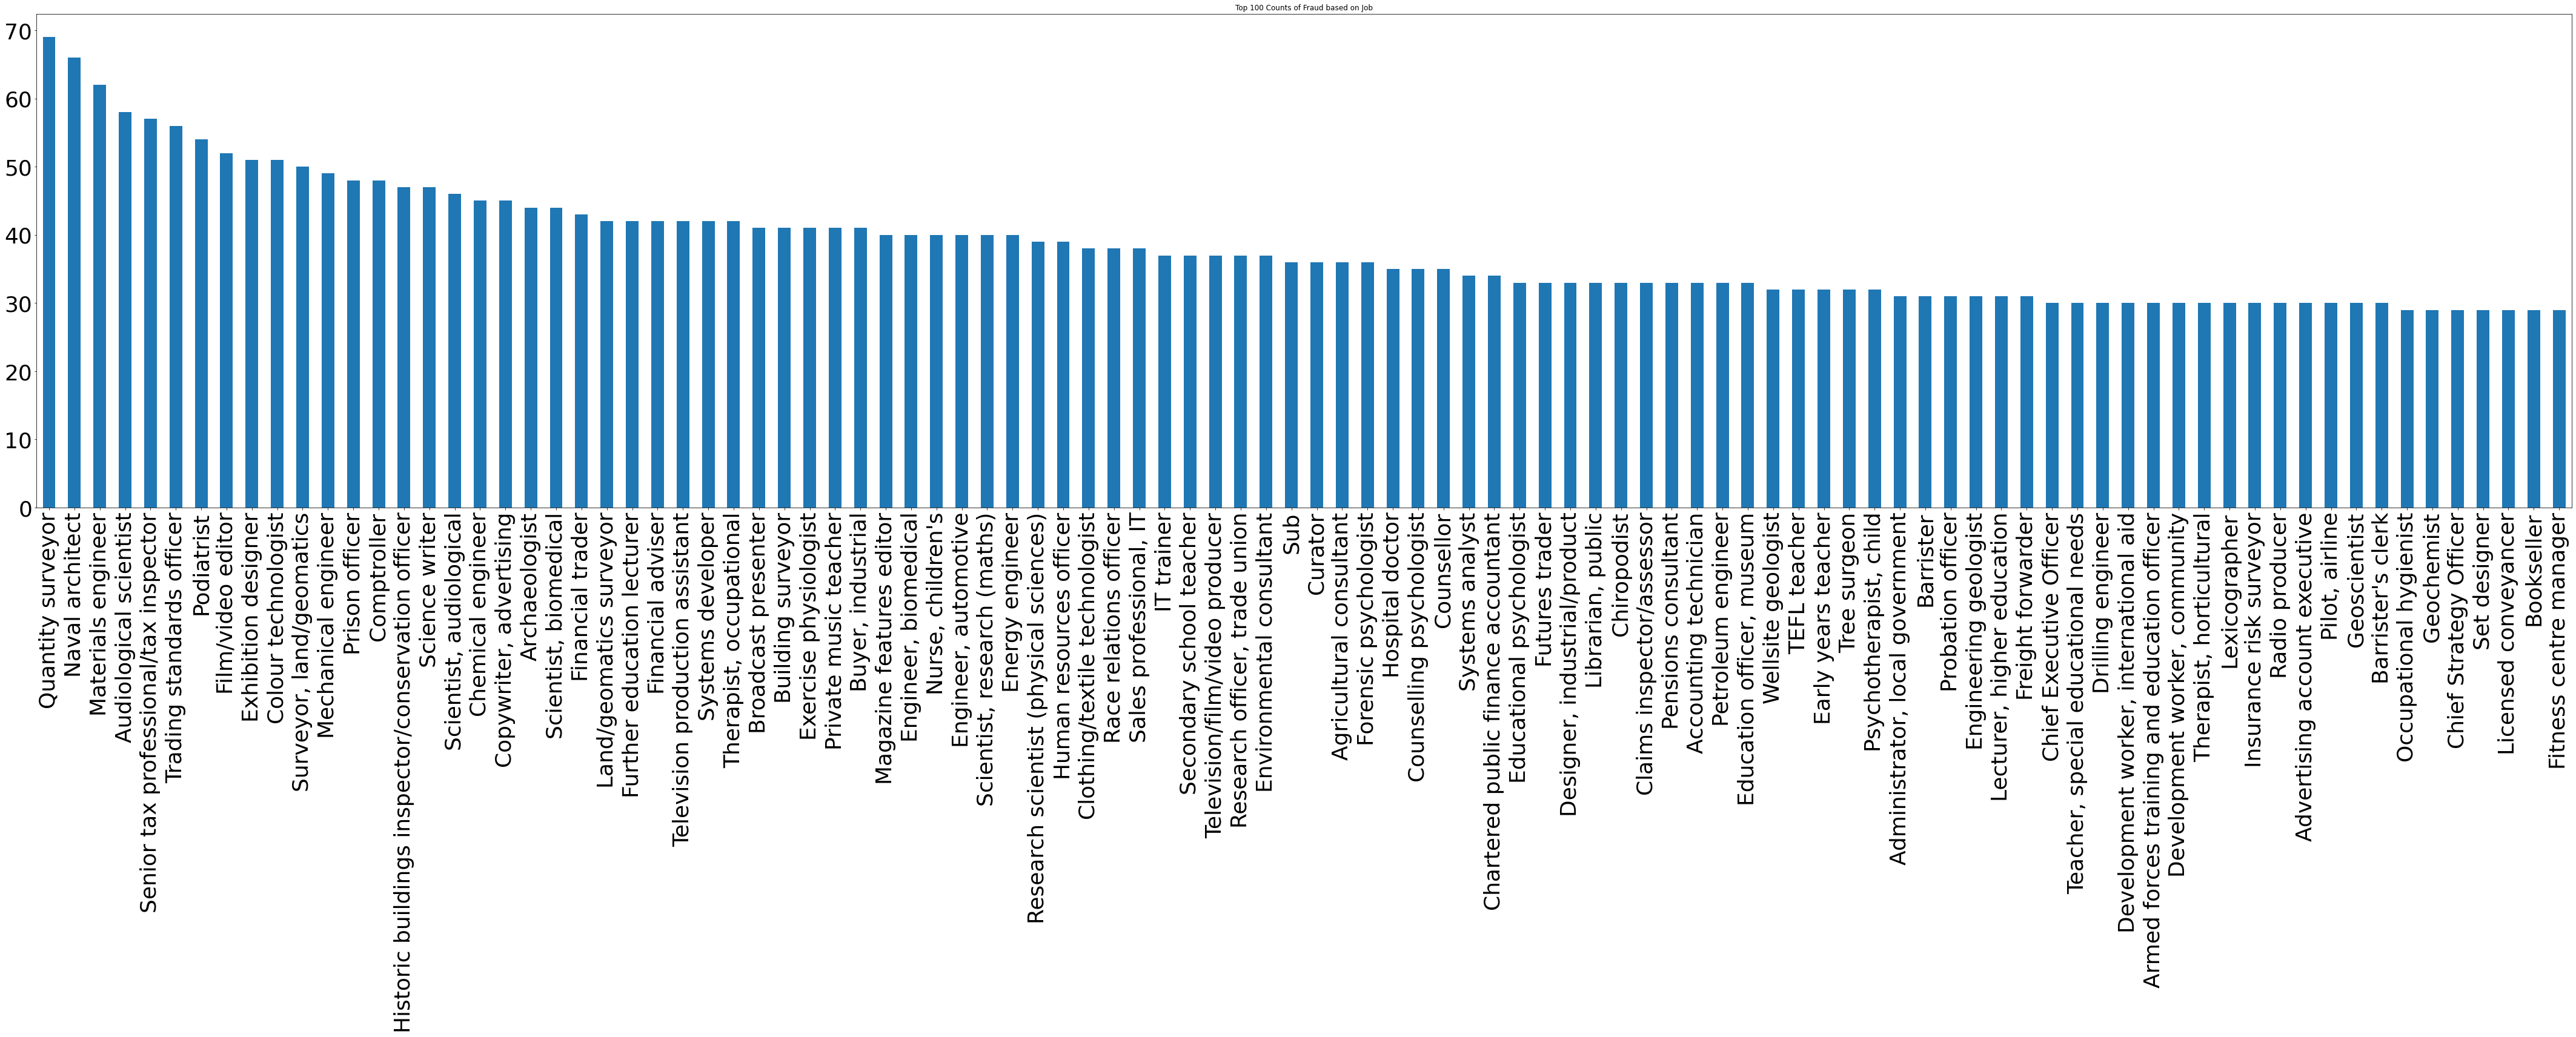

In [33]:
top_job_counts.plot(kind='bar', title = "Top 100 Counts of Fraud based on Job", figsize=(75, 15), fontsize=36)

Quantity surveyor, naval architect, and materials engineer have a bit of a margin of fraud above the rest.

<AxesSubplot:title={'center':'Bottom 100 Counts of Fraud based on Job'}>

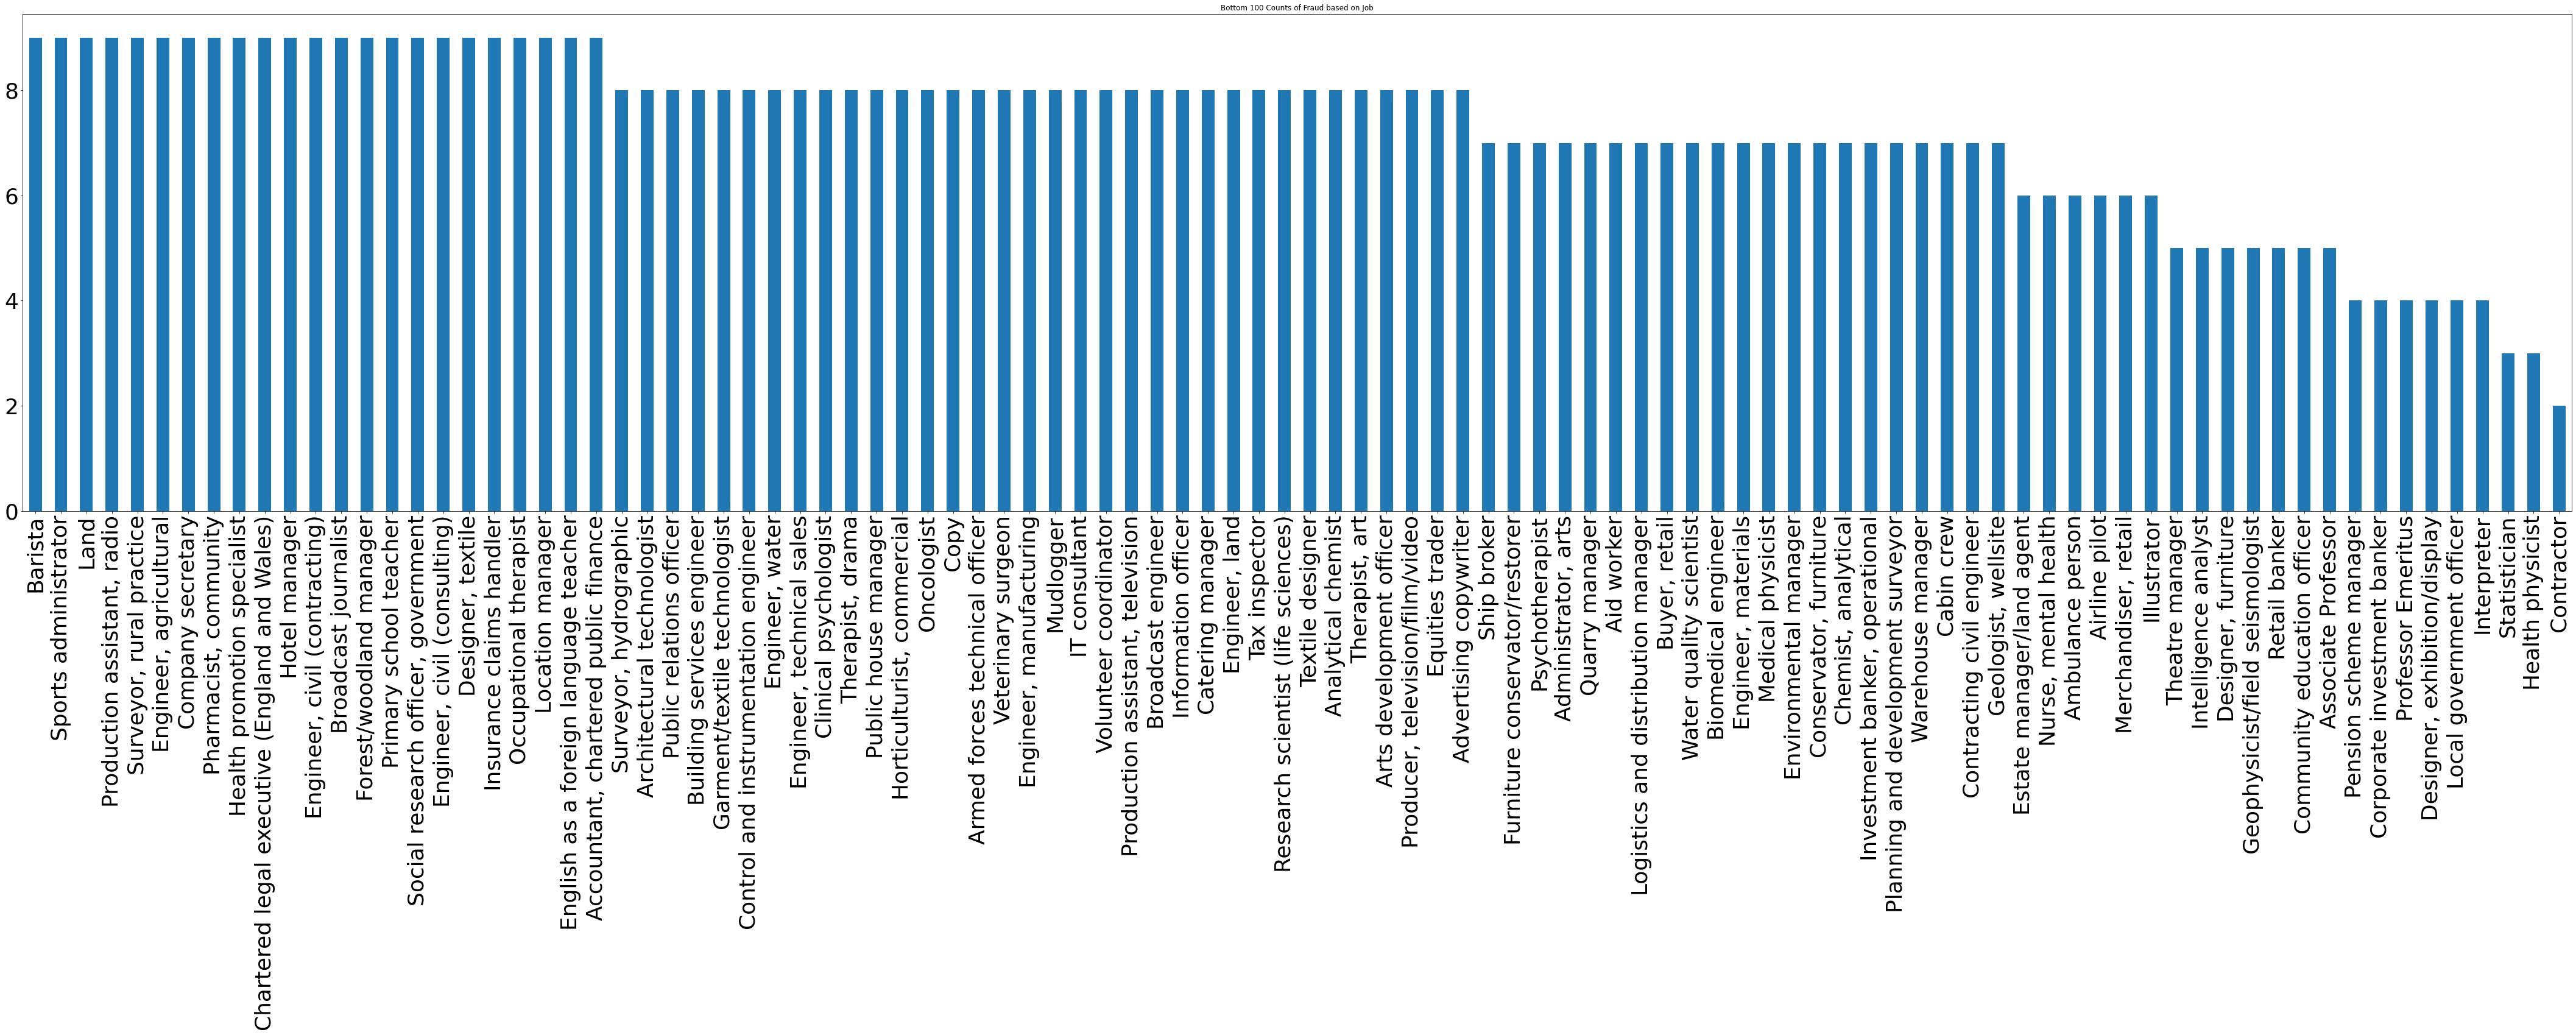

In [34]:
bottom_job_counts.plot(kind='bar', title = "Bottom 100 Counts of Fraud based on Job", figsize=(75, 15), fontsize=36)

One interesting note is that contractor has a significantly low number rate of fraud transactions. I would actually expect this job to have a higher count.

### Additional Questions

### Are number of fraud cases getting worse over time?

In [36]:
fraud_dataset_copy = fraud_dataset.copy()
fraud_instances = fraud_dataset_copy[fraud_dataset_copy["is_fraud"] == 1]

year_column = [datetime.strptime(row_date, date_format).year for row_date in fraud_instances.trans_date_trans_time]
month_column = [datetime.strptime(row_date, date_format).month for row_date in fraud_instances.trans_date_trans_time]

fraud_instances["year"] = year_column
fraud_instances["month"] = month_column

/tmp/ipykernel_1478/231313254.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_instances["year"] = year_column
/tmp/ipykernel_1478/231313254.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_instances["month"] = month_column


In [37]:
fraud_year_trend = fraud_instances.groupby(['year', 'month'])["is_fraud"].value_counts().sort_index()
print(fraud_year_trend)

year  month  is_fraud
2019  1      1           506
      2      1           517
      3      1           494
      4      1           376
      5      1           408
      6      1           354
      7      1           331
      8      1           382
      9      1           418
      10     1           454
      11     1           388
      12     1           592
2020  1      1           343
      2      1           336
      3      1           444
      4      1           302
      5      1           527
      6      1           467
      7      1           321
      8      1           415
      9      1           340
      10     1           384
      11     1           294
      12     1           258
Name: is_fraud, dtype: int64


Instances of fraud have gone down from 2019 to 2020 by a significant margin. This might be due to COVID and lack of consumer spending. More data would be needed in order to answer this

### What amounts is fraud most likely to be in?

In [38]:
# Bin fraud amounts into 20 bins
fraud_amounts = pd.cut(fraud_instances['amt'], bins=20).value_counts(sort=True)
print(fraud_amounts)


(-0.315, 69.809]        2123
(276.056, 344.805]      1845
(894.797, 963.546]       827
(963.546, 1032.295]      794
(826.048, 894.797]       758
(757.299, 826.048]       693
(1032.295, 1101.044]     496
(688.55, 757.299]        432
(207.307, 276.056]       353
(344.805, 413.554]       314
(1101.044, 1169.793]     279
(69.809, 138.558]        187
(619.801, 688.55]        153
(482.303, 551.052]        94
(413.554, 482.303]        85
(1169.793, 1238.542]      81
(551.052, 619.801]        76
(138.558, 207.307]        30
(1238.542, 1307.291]      22
(1307.291, 1376.04]        9
Name: amt, dtype: int64


Fraud is most ikely to happen in smaller amounts less than $350. This is probably because scammer do not want to have their transactions discovered and attemp to do many small transactions over one large one.

### What sex is more susceptible to fraud transactions

In [ ]:
sex_fraud_instances = fraud_instances['sex'].value_counts().sort_index()
print(sex_fraud_instances)

F    4899
M    4752
Name: sex, dtype: int64


Fraud instances are pretty even split between male and female. This could be an indication that this field could be dropped due to it no supplying any new information about the chances of a fraud transaction happening alone. Because of dependencies between M/F and other fields, there coule be some dependant relationship. This is a good column to experiment with to see if models can be increased by dropping.